# Breast Cancer Wisconsin (Diagnostic)

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Create a classifier that can help diagnose patients using the [Breast Cancer Wisconsin (Diagnostic) Database](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Load the breast cancer wisconsin dataset
 
The object returned by load_breast_cancer() is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
breast_cancer = load_breast_cancer(as_frame=True)
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Print the dataset description

In [3]:
print(breast_cancer.DESCR[:1000], end="...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Visualize the dataset

In [4]:
df_breast_cancer = breast_cancer.frame
df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Print a summary of the dataset

In [5]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Visualize the class distribution

How many instances of malignant (encoded 0) and how many of benign (encoded 1)?

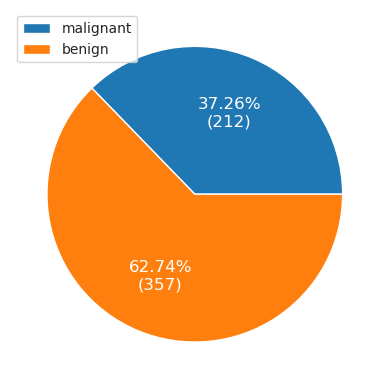

In [6]:
benign = df_breast_cancer["target"].sum()
malignant = len(df_breast_cancer) - benign
labels = breast_cancer["target_names"]
sizes = [malignant, benign]

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(labels)
plt.show()

## Split the dataset into training and test sets

In [7]:
X = df_breast_cancer.drop(['target'], axis=1)
y = df_breast_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Perform a grid search for a k-nearest neighbors (k-NN) classifier

In [8]:
n_neighbors = range(1, 21)
parameters = {'n_neighbors': n_neighbors}

knn_classifier = KNeighborsClassifier()
clf = GridSearchCV(knn_classifier, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='recall')

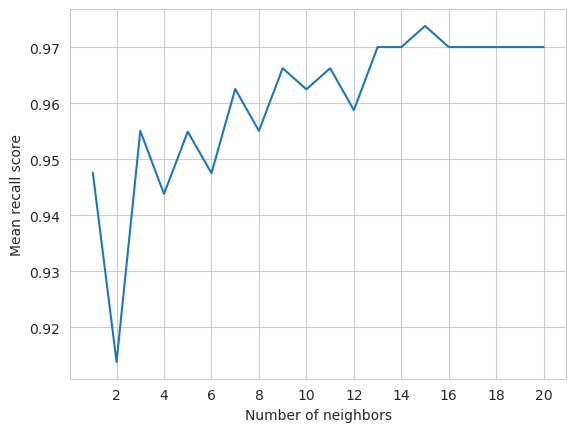

In [9]:
plt.figure()
plt.plot(n_neighbors, clf.cv_results_['mean_test_score'])
plt.xlabel("Number of neighbors")
plt.ylabel("Mean recall score")
plt.xticks(n_neighbors[::-2])
plt.show()

## Evaluate the best estimator chosen by the grid search

In [10]:
y_pred = clf.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9608    0.9245    0.9423        53
           1     0.9565    0.9778    0.9670        90

    accuracy                         0.9580       143
   macro avg     0.9587    0.9512    0.9547       143
weighted avg     0.9581    0.9580    0.9579       143



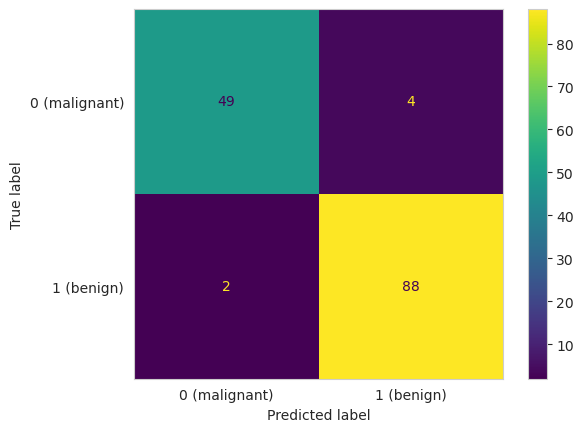

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (malignant)", "1 (benign)"])
plt.grid(False)
plt.show()

## Visualize the predicition scores between training and test sets, as well as malignant and benign cells

Find the training and testing accuracies by target value (i.e. malignant, benign).

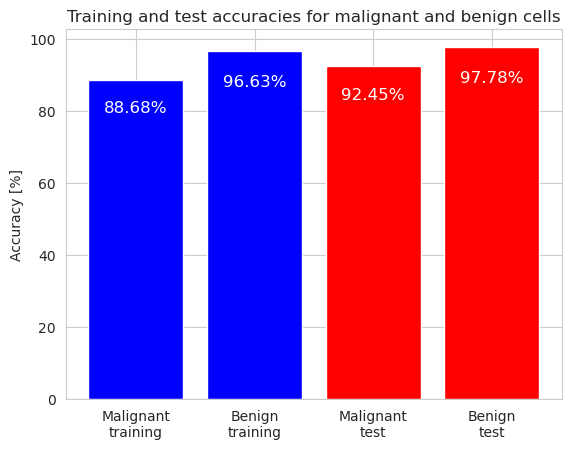

In [ ]:
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

scores = [clf.best_estimator_.score(mal_train_X, mal_train_y)*100, clf.best_estimator_.score(ben_train_X, ben_train_y)*100, 
          clf.best_estimator_.score(mal_test_X, mal_test_y)*100, clf.best_estimator_.score(ben_test_X, ben_test_y)*100]

plt.figure()

# Plot the scores as a bar chart
bars = plt.bar(np.arange(4), scores, color=['b', 'b', 'r', 'r'])

# Directly label the score onto the bars
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*0.9, '{0:.{1}f}%'.format(height, 2), 
                   ha='center', color='w', fontsize=12)

plt.xticks([0, 1, 2, 3], ['Malignant\ntraining', 'Benign\ntraining', 'Malignant\ntest', 'Benign\ntest'])
plt.title('Training and test accuracies for malignant and benign cells')
plt.ylabel('Accuracy [%]')
plt.show()